<a href="https://colab.research.google.com/github/Likitha-Thirumalasetty/Loan-Approval-Prediction/blob/main/Loan_Approval_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Loan Approval Classification**

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# loading the dataset
df = pd.read_csv('/content/credit_risk_dataset.csv')

In [3]:
# Display the first few rows of the dataset
print("Sample Data:")
print(df.head())

Sample Data:
   person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y                  

In [4]:
# Handling missing values
# Filling missing values for person_emp_length with the median value
df['person_emp_length'].fillna(df['person_emp_length'].median(), inplace=True)

# Filling missing values for loan_int_rate with the median value
df['loan_int_rate'].fillna(df['loan_int_rate'].median(), inplace=True)

<ipython-input-4-c6645a15f82e>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['person_emp_length'].fillna(df['person_emp_length'].median(), inplace=True)
<ipython-input-4-c6645a15f82e>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

In [5]:
# Encoding categorical variables
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
categorical_columns = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

In [6]:
# Splitting the data into features and target
X = df.drop('loan_status', axis=1) # Features
y = df['loan_status'] # Target variable

In [7]:
# Encoding the target variable
y = label_encoder.fit_transform(y)

In [8]:
# Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
from sklearn.linear_model import LogisticRegression

# Model training using Logistic Regression
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [11]:
# Making predictions
y_pred = model.predict(X_test)

In [12]:
# Evaluating the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("\nLogistic Regression Model Performance:")
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Logistic Regression Model Performance:
Accuracy: 83.72%
Confusion Matrix:
[[4820  252]
 [ 809  636]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      5072
           1       0.72      0.44      0.55      1445

    accuracy                           0.84      6517
   macro avg       0.79      0.70      0.72      6517
weighted avg       0.83      0.84      0.82      6517



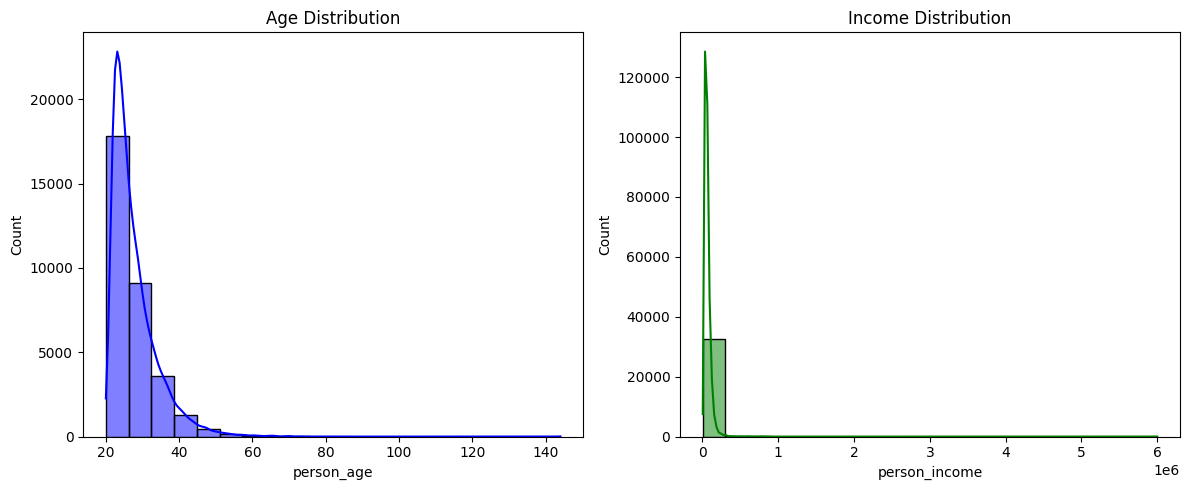

In [13]:
# Data Visualization
# 1. Age and Income Distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['person_age'], bins=20, kde=True, color='blue')
plt.title('Age Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df['person_income'], bins=20, kde=True, color='green')
plt.title('Income Distribution')
plt.tight_layout()
plt.show()

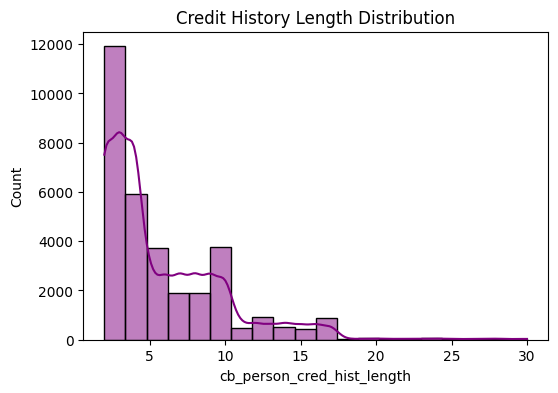

In [14]:
# 3. Credit History Length Distribution
plt.figure(figsize=(6, 4))
sns.histplot(df['cb_person_cred_hist_length'], bins=20, kde=True, color='purple')
plt.title('Credit History Length Distribution')
plt.show()

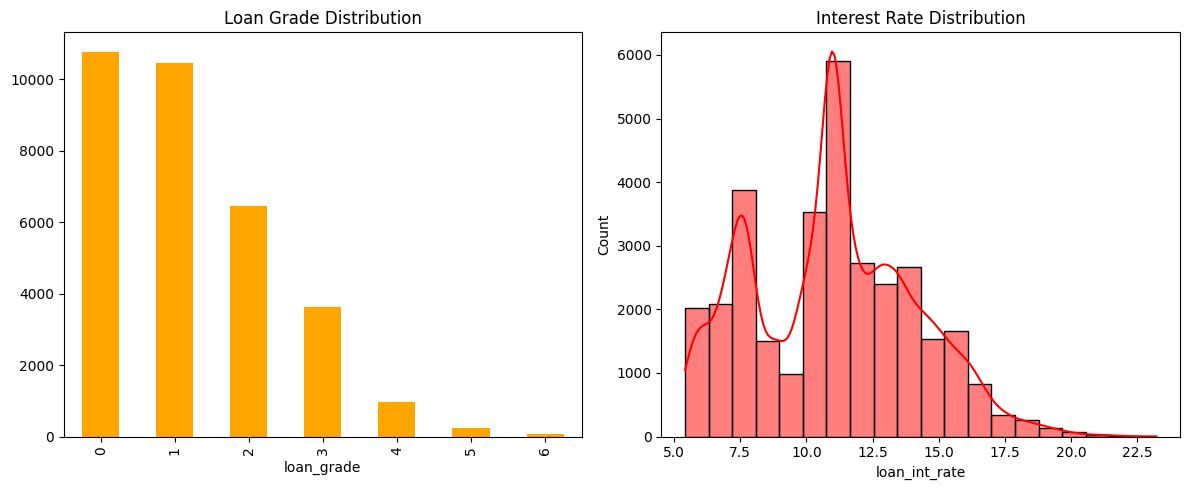

In [15]:
# 4. Loan Grade and Interest Rate Distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
df['loan_grade'].value_counts().plot.bar(color='orange')
plt.title('Loan Grade Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df['loan_int_rate'], bins=20, kde=True, color='red')
plt.title('Interest Rate Distribution')
plt.tight_layout()
plt.show()

In [16]:
# Predicting on new data
new_data = np.array([[30, 55000, 2, 5, 1, 2, 10000, 12.5, 18, 0, 3]]) # Example new data
new_data_scaled = scaler.transform(new_data)
loan_approval_prediction = model.predict(new_data_scaled)

if loan_approval_prediction[0] == 1:
    print("\nLoan Approval Starus: Approved")
else:
    print("\nLoan Approval Status: Not Approved")


Loan Approval Starus: Approved


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
